<a href="https://colab.research.google.com/github/tuba89/clustering/blob/main/clustringCheckpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from numpy import unique
from numpy import where

from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

from sklearn.decomposition import PCA 
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
plt.style.use('ggplot')

#Step 1 : Reading and Understanding Data

In [13]:
cc = "/content/drive/MyDrive/CC GENERAL.csv"

In [14]:

# Reading the data on which analysis needs to be done

data = pd.read_csv(cc, sep=",")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
# shape of df

data.shape

(8950, 18)

In [16]:
# df info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [17]:
# df description

data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#Step 2 : Data Cleaning

* 
there is missing values in (Minimum_payments and credit_limit)

In [18]:
#check frequency values in MINIMUM_PAYMENTS
data['MINIMUM_PAYMENTS'].value_counts()

299.351881     2
3.197940       1
111.691332     1
129.682608     1
872.760983     1
              ..
1227.773229    1
127.210691     1
6422.472544    1
471.940554     1
189.459157     1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64

In [19]:
data['MINIMUM_PAYMENTS'].value_counts()

299.351881     2
3.197940       1
111.691332     1
129.682608     1
872.760983     1
              ..
1227.773229    1
127.210691     1
6422.472544    1
471.940554     1
189.459157     1
Name: MINIMUM_PAYMENTS, Length: 8636, dtype: int64

In [20]:
# Remove the ID featiure (note necessary)
data.drop(columns=['CUST_ID'] , axis=1 , inplace=True)

* Visualize my dataset to explore the outliers


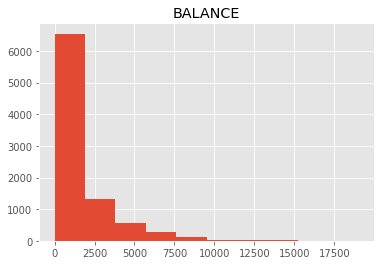

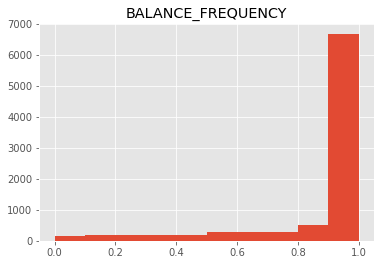

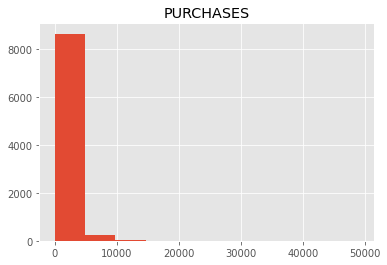

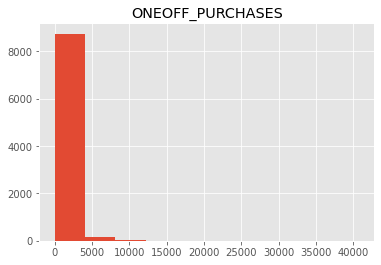

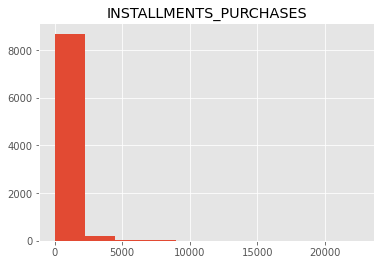

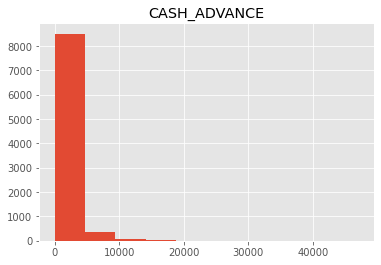

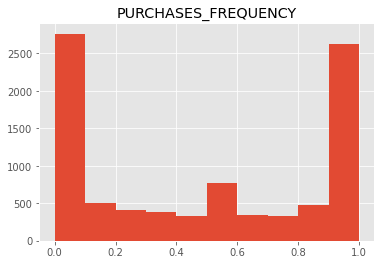

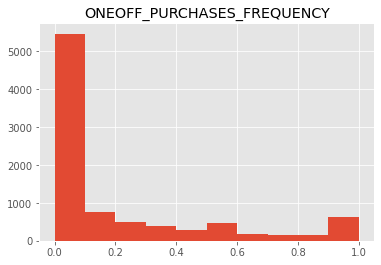

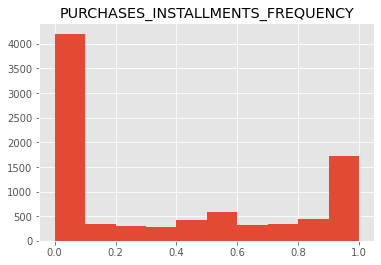

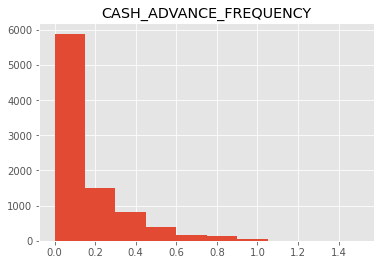

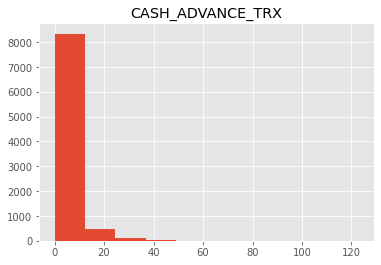

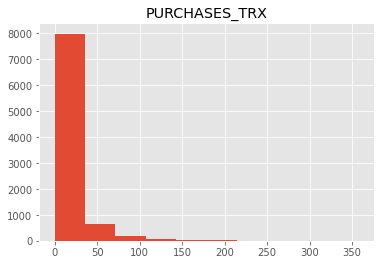

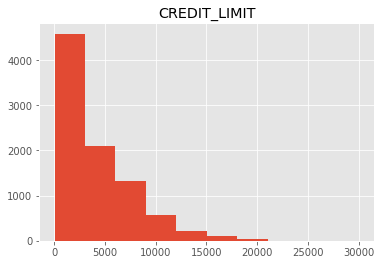

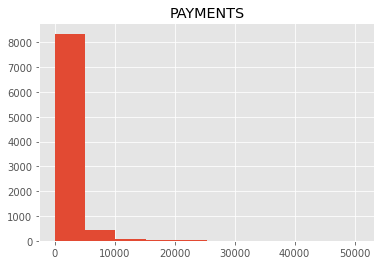

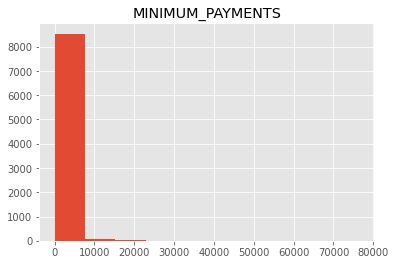

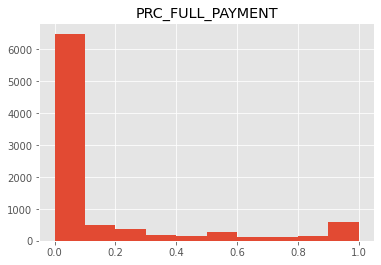

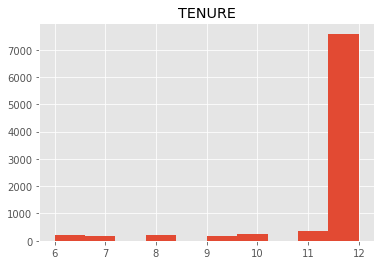

In [21]:
for col in data:
    data[[col]].hist()

* visualize with boxplot

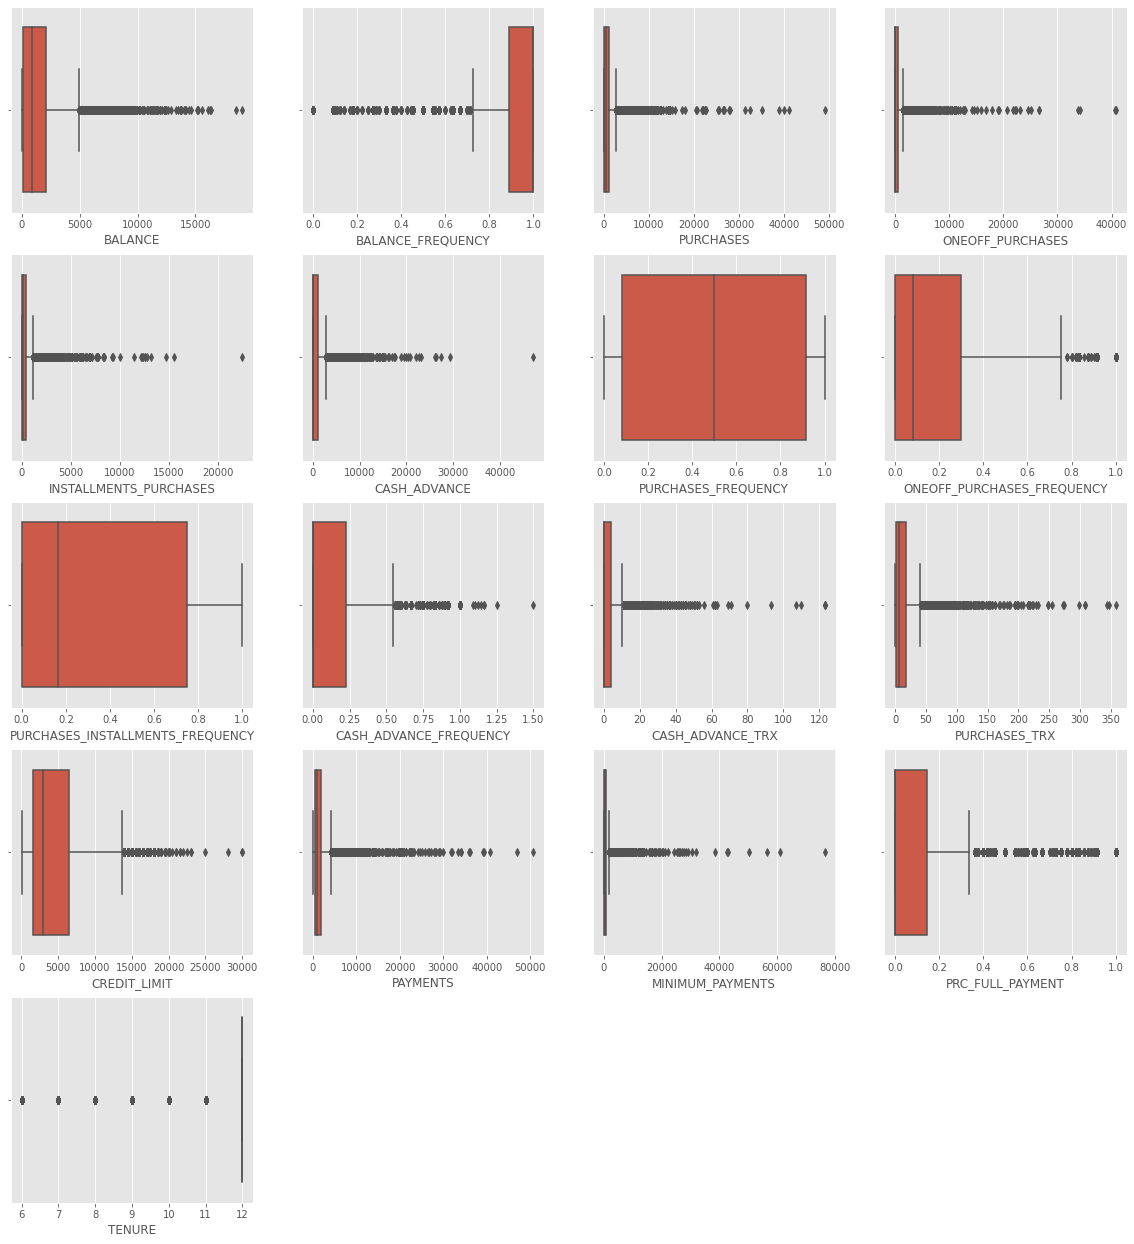

In [22]:
fig = plt.figure(figsize=(20, 22))
for col in range(len(data.columns)) :
    fig.add_subplot(5, 4, col+1)
    sns.boxplot(x = data.iloc[ :, col])

plt.show()

* filling the missing values in (credit_limit & minimum_payment)

In [23]:
data['MINIMUM_PAYMENTS'] = data["MINIMUM_PAYMENTS"].fillna(data['MINIMUM_PAYMENTS'].median())

In [24]:
data['CREDIT_LIMIT']=data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())

In [25]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

* Dropping all outliers

* remove outliers from some important features in   :
    - ['ONEOFF_PURCHASES']
    - ['INSTALLMENTS_PURCHASES']
    - ['CASH_ADVANCE'] 
    - ['CASH_ADVANCE_FREQUENCY']
    - ['CASH_ADVANCE_TRX'] 
    - ['PAYMENTS']
    - ['MINIMUM_PAYMENTS']

In [26]:
data = data.drop(data[data['PURCHASES'] > 4500].index)
data = data.drop(data[data['ONEOFF_PURCHASES'] > 3000].index)
data = data.drop(data[data['INSTALLMENTS_PURCHASES'] > 1800].index)
data = data.drop(data[data['CASH_ADVANCE'] > 3500].index) 
data = data.drop(data[data['CASH_ADVANCE_FREQUENCY'] > 1.3].index)
data = data.drop(data[data['CASH_ADVANCE_TRX'] > 55].index)
data = data.drop(data[data['PAYMENTS']>3500].index)
data = data.drop(data[data['MINIMUM_PAYMENTS'] > 4000].index)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           7038 non-null   float64
 1   BALANCE_FREQUENCY                 7038 non-null   float64
 2   PURCHASES                         7038 non-null   float64
 3   ONEOFF_PURCHASES                  7038 non-null   float64
 4   INSTALLMENTS_PURCHASES            7038 non-null   float64
 5   CASH_ADVANCE                      7038 non-null   float64
 6   PURCHASES_FREQUENCY               7038 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        7038 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  7038 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            7038 non-null   float64
 10  CASH_ADVANCE_TRX                  7038 non-null   int64  
 11  PURCHASES_TRX                     7038 non-null   int64  
 12  CREDIT

In [28]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.0,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.0,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.0,12


In [29]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000,7038.000000
mean,1131.606619,0.864535,571.999689,317.392938,254.878697,475.779481,0.472414,0.173244,0.346166,0.108918,2.234157,10.676186,3725.009667,881.612157,488.400493,0.149908,11.483944
std,1523.791663,0.248908,706.365327,548.470884,372.085234,809.023720,0.392846,0.272526,0.386343,0.170041,4.312045,14.566080,3035.955474,744.604031,586.502596,0.289971,1.384545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.019163,0.000000,6.000000
25%,77.906598,0.833333,42.507500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,320.186780,161.596253,0.000000,12.000000
50%,606.761671,1.000000,311.675000,0.000000,75.120000,0.000000,0.416667,0.000000,0.166667,0.000000,0.000000,6.000000,2710.000000,651.613201,262.212354,0.000000,12.000000
75%,1524.195207,1.000000,827.350000,411.900000,383.952500,682.162079,0.916667,0.250000,0.727273,0.166667,3.000000,13.000000,5000.000000,1266.652190,576.937898,0.125000,12.000000
max,13968.479570,1.000000,4381.860000,2991.450000,1800.000000,3494.069968,1.000000,1.000000,1.000000,1.166667,52.000000,232.000000,25000.000000,3499.936377,3999.109938,1.000000,12.000000


* normalizotion (
Feature Scaling)

In [30]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

#Using Hierarchical Clustering

In [31]:
#Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

model = AgglomerativeClustering(n_clusters = 4, 
                                   affinity = 'euclidean', 
                                   linkage = 'ward')

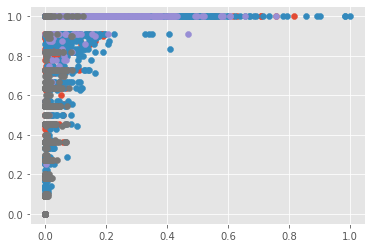

In [33]:
# fit model and predict clusters
yhat = model.fit_predict(data)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(data[row_ix, 0], data[row_ix, 1])
# show the plot
pyplot.show()

In [34]:
df = pd.DataFrame({'data':yhat})
df['data'].value_counts()

1    2686
0    2208
3    1133
2    1011
Name: data, dtype: int64

* Trying; reduce dimesionality with PCA

In [35]:
pca = PCA(n_components = 2)
reduced_data = pca.fit_transform(data)
explained_varience = pca.explained_variance_ratio_

In [36]:
reduced_data = pd.DataFrame(reduced_data, columns=['First Pca', 'Second Pca'])

new_data = reduced_data.copy()
new_data = pd.DataFrame(new_data , columns=['First Pca', "Second Pca"])


In [37]:
new_data.head()

,First Pca,Second Pca
0,-0.452197,-0.216605
1,0.278181,0.735210
2,-0.480885,0.119114
3,-0.533812,-0.034378
4,0.425832,-0.014589


# plotting Clusters

In [38]:
np.count_nonzero(yhat)

4830

In [39]:
df = pd.DataFrame({'data':yhat})
df['data'].value_counts()

1    2686
0    2208
3    1133
2    1011
Name: data, dtype: int64

In [40]:

reduced_data['clusters'] = yhat


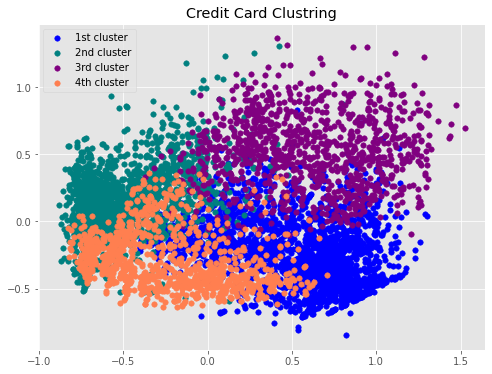

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(reduced_data.loc[reduced_data['clusters'] == 0 , 'First Pca'] , 
            reduced_data.loc[reduced_data['clusters'] == 0 , 'Second Pca'] ,
            c='blue' ,
            s=30 ,
            label='1st cluster')

plt.scatter(reduced_data.loc[reduced_data['clusters'] == 1 , 'First Pca'] , 
            reduced_data.loc[reduced_data['clusters'] == 1 , 'Second Pca'] ,
            c='teal' , 
            s=30,
            label='2nd cluster')

plt.scatter(reduced_data.loc[reduced_data['clusters'] == 2 , 'First Pca'] , 
            reduced_data.loc[reduced_data['clusters'] == 2 , 'Second Pca'] ,
            c='purple' , 
            s=30,
            label='3rd cluster')

plt.scatter(reduced_data.loc[reduced_data['clusters'] == 3 , 'First Pca'] , 
            reduced_data.loc[reduced_data['clusters'] == 3 , 'Second Pca'] ,
            c='coral' , 
            s=30,
            label='4th cluster')

plt.title('Credit Card Clustring')
plt.legend()
#plt.colorbar()
plt.show()

#Plotting Dendogram

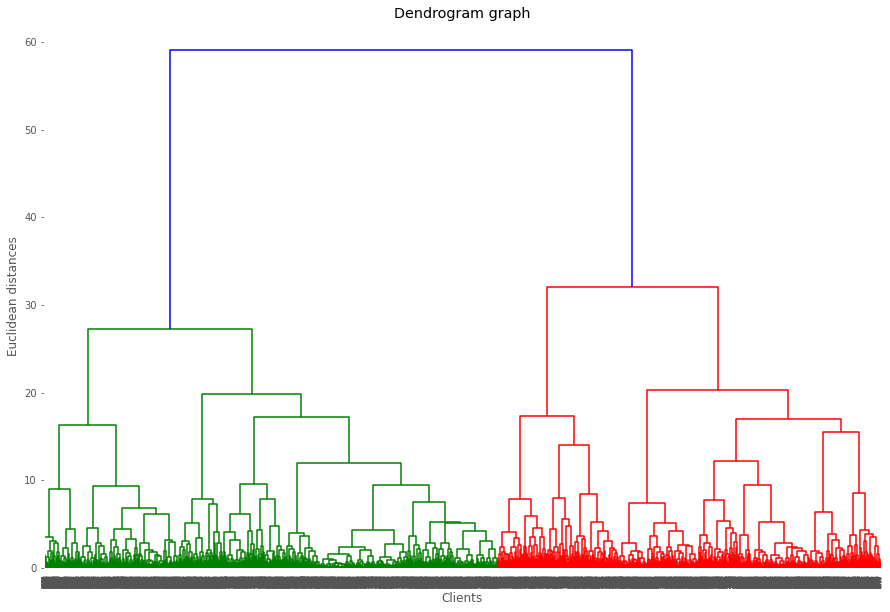

In [42]:
plt.figure(figsize=(15, 10)) 
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))

plt.title('Dendrogram graph')
plt.xlabel('Clients')
plt.ylabel('Euclidean distances')

plt.show()

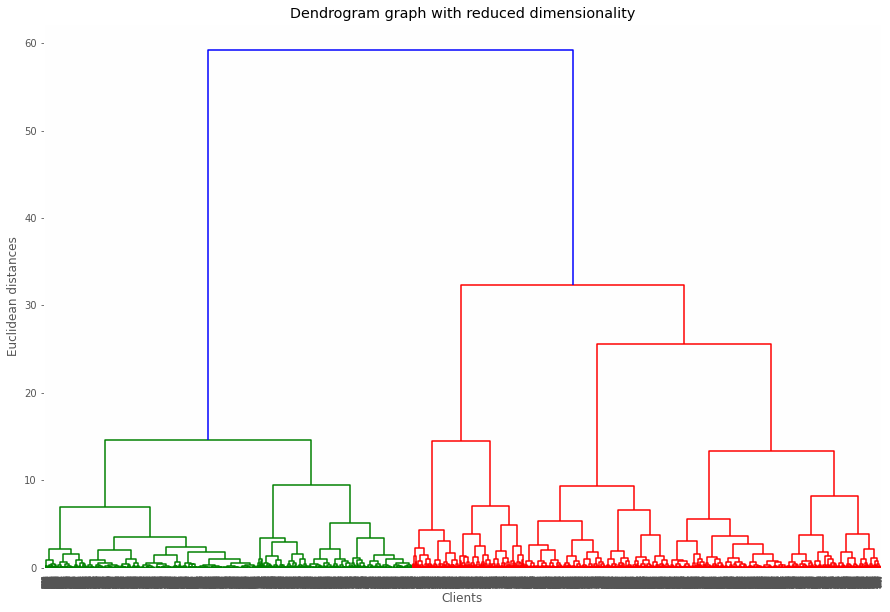

In [43]:
plt.figure(figsize=(15, 10)) 
dendrogram = sch.dendrogram(sch.linkage(new_data, method = 'ward'))

plt.title('Dendrogram graph with reduced dimensionality')
plt.xlabel('Clients')
plt.ylabel('Euclidean distances')

plt.show()

#Use k-means clustering

In [44]:
kmeans= KMeans(n_clusters= 4, 
               random_state=20,)  #Cluster our data by choosing 4 as number of clusters
kmeans.fit(new_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=20, tol=0.0001, verbose=0)

In [45]:
labels = pd.DataFrame(kmeans.labels_)

In [46]:
kmeans = kmeans.fit(new_data)
clusterskmeans = kmeans.predict(new_data)

In [47]:
new_data['label'] = clusterskmeans

In [48]:
df = pd.DataFrame({'data':clusterskmeans})
df['data'].value_counts()

1    3051
2    1595
3    1310
0    1082
Name: data, dtype: int64

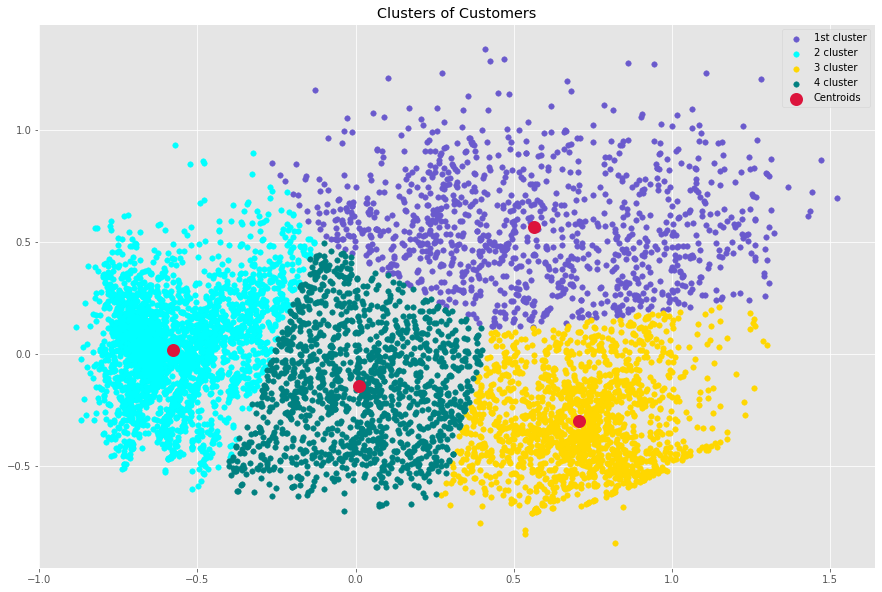

In [49]:
plt.figure(figsize=(15, 10)) 

plt.scatter(new_data.loc[new_data['label'] == 0 , 'First Pca'] , 
            new_data.loc[new_data['label'] == 0 , 'Second Pca'] ,
            c='slateblue' ,
            s=30 ,
            label='1st cluster')

plt.scatter(new_data.loc[new_data['label'] == 1 , 'First Pca'] , 
            new_data.loc[new_data['label'] == 1 ,'Second Pca'] ,
            c='cyan' ,
            s=30 ,
            label='2 cluster')

plt.scatter(new_data.loc[new_data['label'] == 2 , 'First Pca'] , 
            new_data.loc[new_data['label'] == 2 ,'Second Pca'] ,
            c='gold' ,
            s=30 ,
            label='3 cluster')

plt.scatter(new_data.loc[new_data['label'] == 3 , 'First Pca'] , 
            new_data.loc[new_data['label'] == 3 ,'Second Pca'] ,
            c='teal' ,
            s=30 ,
            label='4 cluster')


centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=100, linewidths=3,
            color='crimson', zorder=50, label = 'Centroids')



# plt.scatter(kmeans.cluster_centers_[:, 0], 
#             kmeans.cluster_centers_[:, 1], 
#             s=300, 
#             c='red', 
#             label = 'Centroids')


plt.title('Clusters of Customers')

plt.legend()


plt.show()

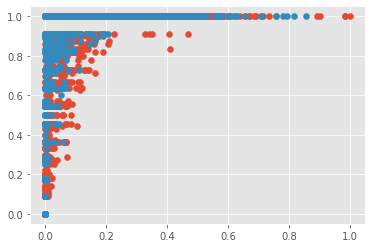

In [50]:
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(data)
# assign a cluster to each example
yhatkmean = model.predict(data)
# retrieve unique clusters
clusters = unique(yhatkmean)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhatkmean == cluster)
	# create scatter of these samples
	pyplot.scatter(data[row_ix, 0], data[row_ix, 1])
# show the plot

pyplot.show()

# 5. Choosing the Appropriate Number of Clusters

#Best K with ElBow method

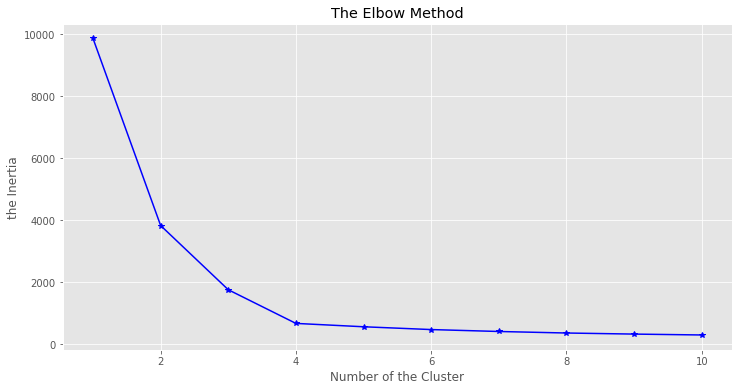

In [51]:
plt.figure(figsize = (12,6))
inertia =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i , init='k-means++' ,random_state = 42)
    kmeans.fit(new_data)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,11) , inertia,  marker = '*', color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of the Cluster')
plt.ylabel('the Inertia')

plt.show()

* it seems that the best k value is 4.
    * where the inertia curve starts to bend is the elbow point, the last value had an abrupt decrease (sudden decrease), and here, the elbow is located at x=4:, 
    *  As more centroids are added, the distance from each point to its closest centroid will decrease.
* to identify the elbow point programmatically i'm going to try kneed solution

In [52]:
!python -m pip install kneed

In [53]:
import kneed

In [54]:
from kneed import KneeLocator

In [55]:
kl = KneeLocator(range(1, 11), 
                 inertia, 
                 curve="convex", 
                 direction="decreasing")
kl.elbow

4



The Best K value is 4, witch mean 4 clusters, like i ploted above

#7. Compare the two results

* In hieararchical clustering:

    * the longest vertical line is the blue one, with my first data without "pca" without dimensionality reduction the optimal number of clusters is **eqaul to 2**, because if we draw a horzontal line at treshold = 40, there is 2 intersected point witch means 2 cluster to similarities.
    * & in my new data with **"PCA"**, when we draw a line in the longuest vertiacl line "the blue one" 4 intersected point appear, whith means the optimum cluster is **equal to 4**

* in K-means clustering:
    * the best k value determined above with elbow methode by plotting the elbow curve is seems appearing in the number 4
    * & when i try the kneed methode to define the best k-value programmatically it gives as also 4,
    * the best k-value is 4, witch means 4 clusters, 4 categories

# Bonus: search for another validation metric

# validation with Silouhette score

***1- Hierarchical***

In [56]:
# hierarchical list
sil_hrc = []
# Applying agglomerative algorithm with range of clusters, 
# using 3 diffrent distances as a metric
#for cluster in range(2, 21, 2):
for cluster in range(2, 11, 2):
    for link in ['ward', "average", "complete"]:
        agglomerative_s = AgglomerativeClustering(n_clusters= cluster, 
                                                affinity= 'euclidean',
                                                linkage= link).fit_predict(new_data)

        # silhouette score                                        
        silhouette = silhouette_score(new_data,
                                      agglomerative_s,
                                      metric='euclidean')
        
        sil_hrc.append((cluster, silhouette, link, len(set(agglomerative_s))))

data_hierarchic = pd.DataFrame(sil_hrc, columns=['Cluster', 
                                                 'Silhouette Score', 
                                                 'Linkage methode', 
                                                 "cluster Number"])

In [57]:
data_hierarchic.sort_values('Silhouette Score', ascending=False)

,Cluster,Silhouette Score,Linkage methode,cluster Number
3,4,0.743133,ward,4
4,4,0.743133,average,4
5,4,0.743133,complete,4
7,6,0.628362,average,6
0,2,0.602943,ward,2
1,2,0.602943,average,2
8,6,0.560950,complete,6
6,6,0.498386,ward,6
10,8,0.498332,average,8
13,10,0.461237,average,10


#note
* A silhouette coefficient of 0 indicates that clusters are significantly overlapping one another, 
* and a silhouette coefficient of 1 indicates clusters are well-separated

* slihouette value = 0.74 it's pretty good it prduced a very clear cluster, also 4 clusters is the best according silouhette score

----

***2- k-means***

In [58]:
kmeans_values=[]

for cluster in range(2,11):
    kmeans_s = KMeans(n_clusters=cluster, random_state=40).fit_predict(new_data)
    sil_score = silhouette_score(new_data, 
                                         kmeans_s, 
                                         metric='euclidean')
    
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
                                                                   silhouette_score(new_data, 
                                                                                    kmeans_s, 
                                                                                    metric='euclidean')))
    kmeans_values.append((cluster, sil_score))

Silhouette score for 2 cluster k-means: 0.603
Silhouette score for 3 cluster k-means: 0.683
Silhouette score for 4 cluster k-means: 0.743
Silhouette score for 5 cluster k-means: 0.700
Silhouette score for 6 cluster k-means: 0.535
Silhouette score for 7 cluster k-means: 0.477
Silhouette score for 8 cluster k-means: 0.399
Silhouette score for 9 cluster k-means: 0.377
Silhouette score for 10 cluster k-means: 0.366


The best one is 4 cluster because Silhouette score for 4 cluster is **equal to 0.743**
witch mean also the optimum vaalue of clusters is 4 clusters

* comaring results for silhouette score

* Hietatchical & kmeans clustering with there best values model

In [59]:
best_hc = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean', 
                                      n_clusters=4).fit_predict(new_data)

In [60]:
best_kmns = KMeans(n_clusters=4).fit_predict(new_data)

In [61]:
Hierarchical_Silhouette_Score = silhouette_score(new_data, best_hc, metric='euclidean')
kmeansSilhouette_Score = silhouette_score(new_data, best_kmns, metric='euclidean')


In [62]:
Clustering_Silhouette_Scores  = [ ['KMeans', kmeansSilhouette_Score ],
                                 ['Hierarchical', Hierarchical_Silhouette_Score ]]

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, 
                                             columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
0,KMeans,0.743133
1,Hierarchical,0.743133


* The models give me the same result ! models predicted same result